In [27]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
import os
import math

df = pd.read_csv(os.path.join(
    os.getcwd(), 
    "data", 
    "country_vaccinations.csv"))

In [28]:
def getNotValidISOCodes():
    for code in df.iso_code.unique():
        if len(code) != 3:
            yield code

            
def getCountryFromISO(code):
    return df[code == df.iso_code].country.iloc[0]
    

def getNotValidCountries():
    for code in getNotValidISOCodes():
        country = getCountryFromISO(code) 
        yield (country, code)

        
for country in getNotValidCountries():
    name, code = country
    print(f"{name} has code {code}")

England has code OWID_ENG
Kosovo has code OWID_KOS
Northern Cyprus has code OWID_CYN
Northern Ireland has code OWID_NIR
Scotland has code OWID_SCT
Wales has code OWID_WLS


In [3]:
# CODE FOR CHANGE NOT VALID ISO_CODES AND COUNTRY NAMES
# AFTER THIS IS NEED TO MERGE UK SAMPLES INTO SINGLE ROWS
# uk_code = 'GBR'
# cyprus_code = 'CYP'
# kosovo_code = 'XKX'
# uk_name = getCountryFromISO(uk_code)
# cyprus_name = getCountryFromISO(cyprus_code)

# def swapValuesInColumn(old, new):
#     global df
#     df = df.replace(old, new) 

    
# # change code for kosovo
# swapValuesInColumn('OWID_KOS', kosovo_code)

# # join nothern cyprus into "classic" cyprus
# swapValuesInColumn('OWID_CYN', cyprus_code)
# swapValuesInColumn('Northern Cyprus', cyprus_name)

# # merge rest of countries to UK
# for region in getNotValidCountries():
#     name, code = region
#     swapValuesInColumn(code, uk_code)
#     swapValuesInColumn(name, uk_name)

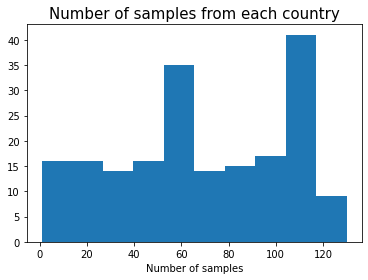

Canada has delivered 130 samples
China has delivered 129 samples
Russia has delivered 129 samples
Israel has delivered 125 samples
United States has delivered 124 samples
Djibouti has delivered only 1 samples
Ethiopia has delivered only 1 samples
Libya has delivered only 1 samples
Somalia has delivered only 1 samples
Timor has delivered only 1 samples


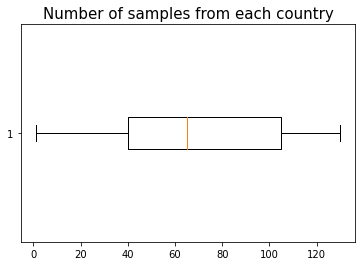

In [54]:
def getNumberOfSamplesIn(country):
    data = df.loc[df['country'] == country]
    n, _ = data.shape
    return n

def getSamplesCount():
    for country in df.country.unique():
        yield country, getNumberOfSamplesIn(country)

def makeCountrySampleHist():
    samples = list(getSamplesCount())
    samples = sorted(samples, key=lambda x: x[1], reverse=True)
    numbers = [sample[1] for sample in samples]
    plt.hist(numbers)
    plt.xlabel("Number of samples")
    plt.title("Number of samples from each country", fontsize=15)
    plt.show()
    return samples, numbers
    
def showExtremeValues(samples, limit=5):
    for index, sample in enumerate(samples):
        if index < limit:
            country, count = sample
            print(f"{country} has delivered {count} samples")
        elif index > len(samples) - 1 - limit:
            country, count = sample
            print(f"{country} has delivered only {count} samples")
    

def showBoxPlot(samples, title="Number of samples from each country"):
    plt.title(title, fontsize=15)
    return plt.boxplot(samples, vert=False)
    
samples, numbers = makeCountrySampleHist()
showExtremeValues(samples)
_ = showBoxPlot(numbers)

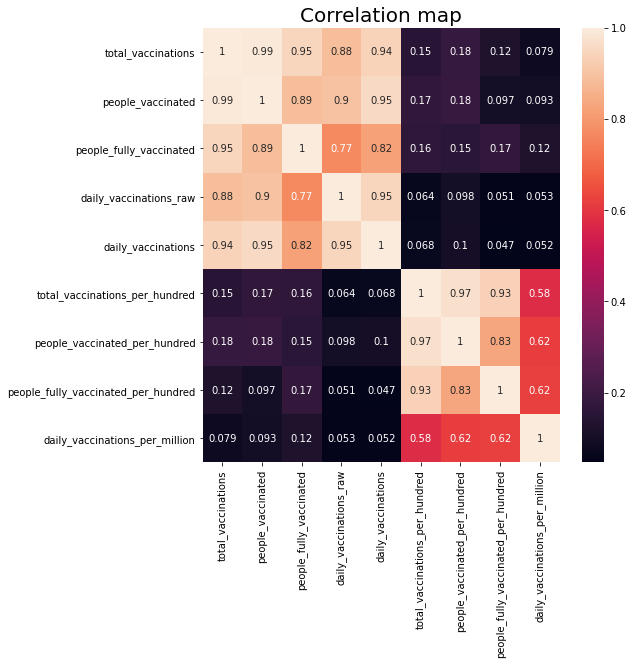

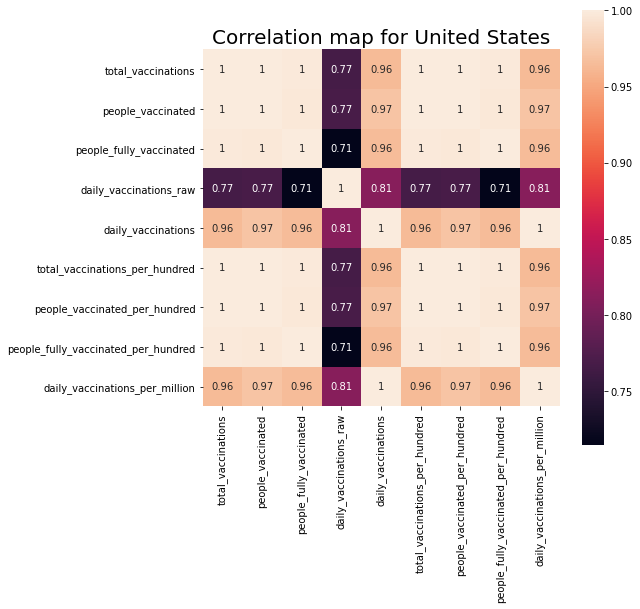

In [50]:
def makeHeatMap():
    plt.subplots(figsize=(8, 8))
    sns.heatmap(df.corr(), annot=True)
    plt.title("Correlation map", fontsize=20)
    plt.show()
    

def makeCorrHeatMapFrom(country):
    data = df.loc[df['country'] == country]
    plt.subplots(figsize=(8, 8))
    sns.heatmap(data.corr(), annot=True, square=True)
    plt.title(f"Correlation map for {country}", fontsize=20)
    plt.show()
    

makeHeatMap()
makeCorrHeatMapFrom('United States')

[1.04 0.  ]
[28.09 67.56]


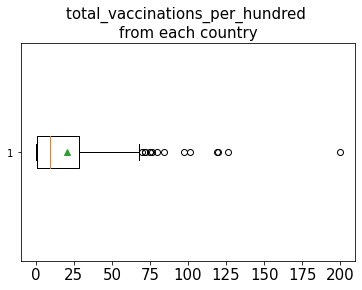

(199.95, 'Gibraltar')
[0.9875 0.    ]
[21.385 51.38 ]


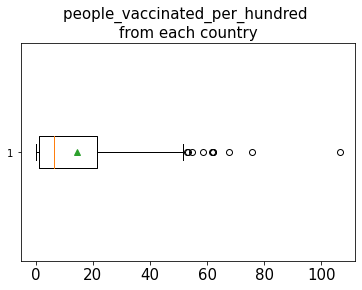

(106.59, 'Gibraltar')
[0.965 0.   ]
[11.49 26.68]


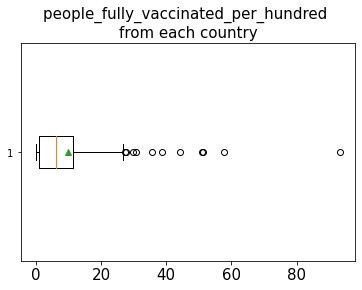

(93.36, 'Gibraltar')


In [115]:
def getMaxValueFrom(attr, country):
    data = df.loc[df['country'] == country]
    x = data[attr].max() 
    if pd.isnull(x):
        return -1, country
    else:
        return x, country

def getMaxValuesFrom(attr):
    for country in df.country.unique():
        yield getMaxValueFrom(attr, country)

        
def makeBoxPlot(samples, title=""):
    plt.title(title, fontsize=15)
    plt.xticks(fontsize=15)
    return plt.boxplot(samples, vert=False,showmeans=True)

    
def makeBoxPlotOf(attr):
    samples = list(getMaxValuesFrom(attr))
    samples = [sample for sample in samples if (sample[0] != -1)]
    samples.sort(key=lambda x: x[0], reverse=True)
    nums = [num[0] for num in samples]
    title = f"{attr} \nfrom each country"
    xdict = makeBoxPlot(nums, title=title)
    for item in xdict['whiskers']:
        print(item.get_xdata())
    return samples
    
tvp = makeBoxPlotOf('total_vaccinations_per_hundred')
plt.show()
print(tvp[0])

pvp = makeBoxPlotOf('people_vaccinated_per_hundred')
plt.show()
print(pvp[0])

pfv = makeBoxPlotOf('people_fully_vaccinated_per_hundred')
plt.show()
print(pfv[0])

